# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.






In [ ]:
import numpy as np
import matplotlib.pyplot as plt


sig = 1
a = 1 #valeur choisie arbitrairement
b = 2 #valeur choisie arbitrairement
K = 1000 #valeur choisie arbitrairement (mais grande)
A0 = 1 #valeur choisie arbitrairement
lambda0 = np.pi/3 #valeur choisie arbitrairement

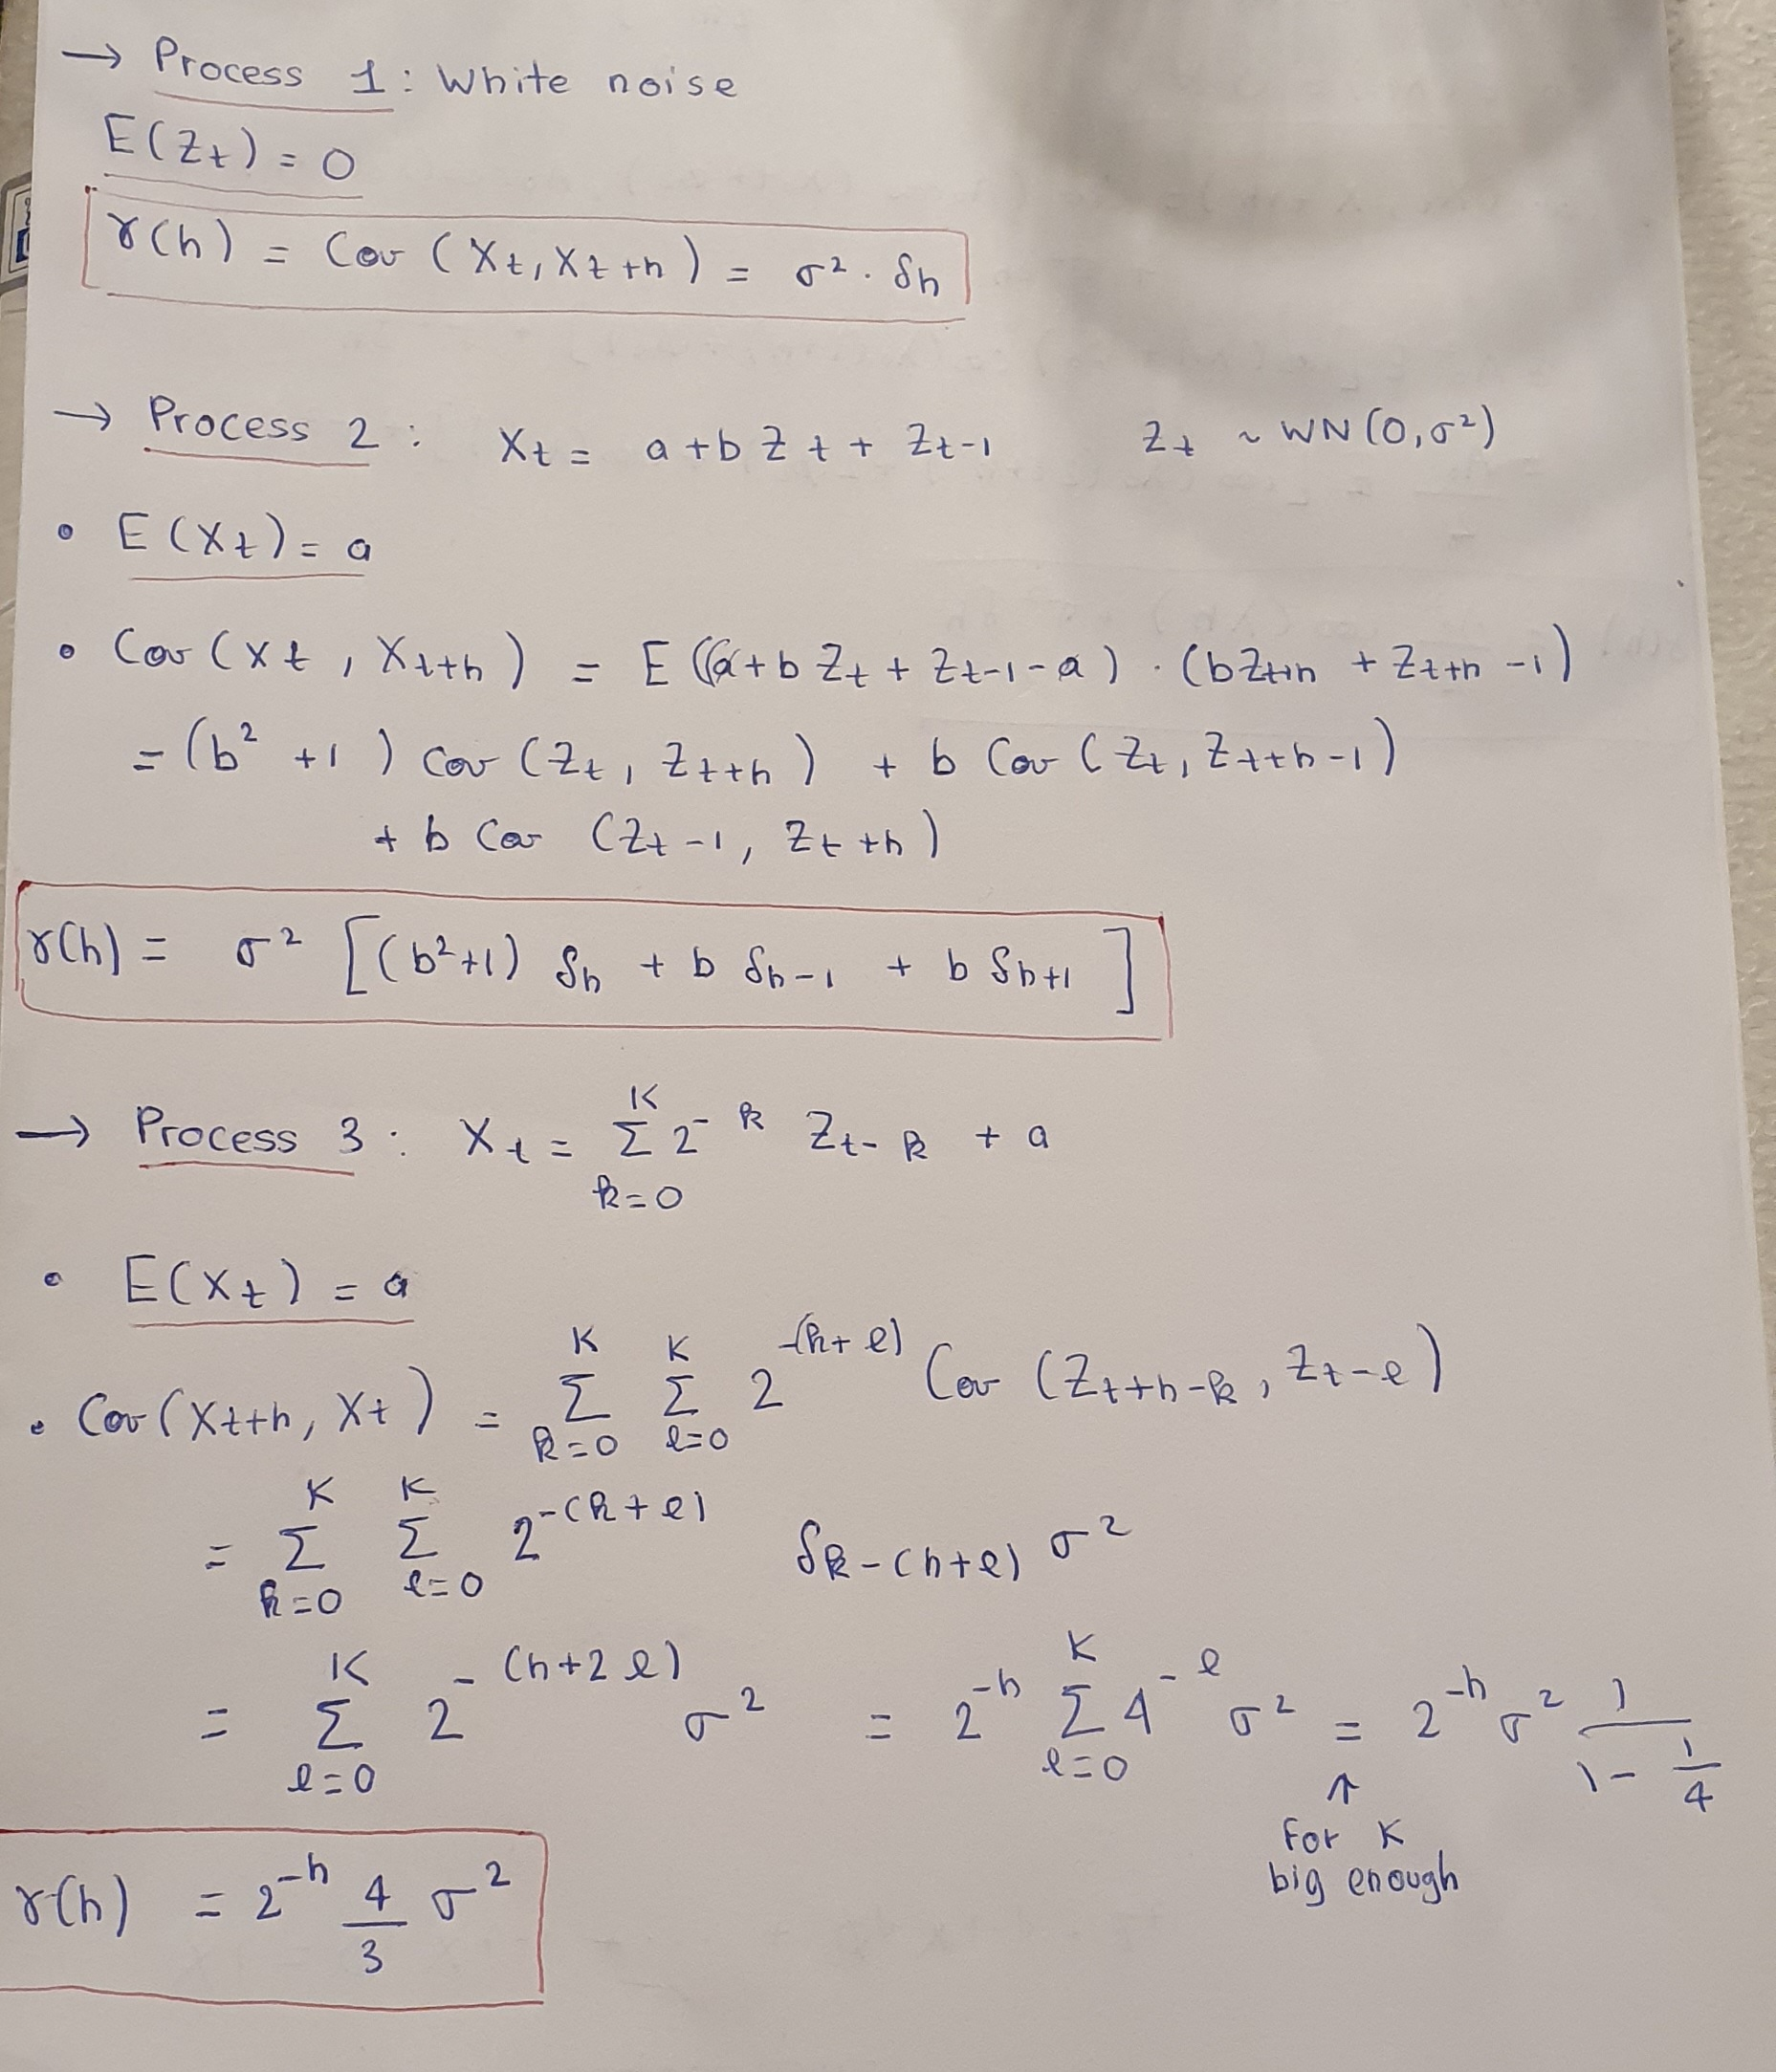

In [ ]:

from IPython.display import Image
image_path =r'C:\Users\manel\OneDrive\Documents\2A\tsia\tp1_monroux_wafra\q1.jpg' 

Image(filename=image_path , width=300, height=200)


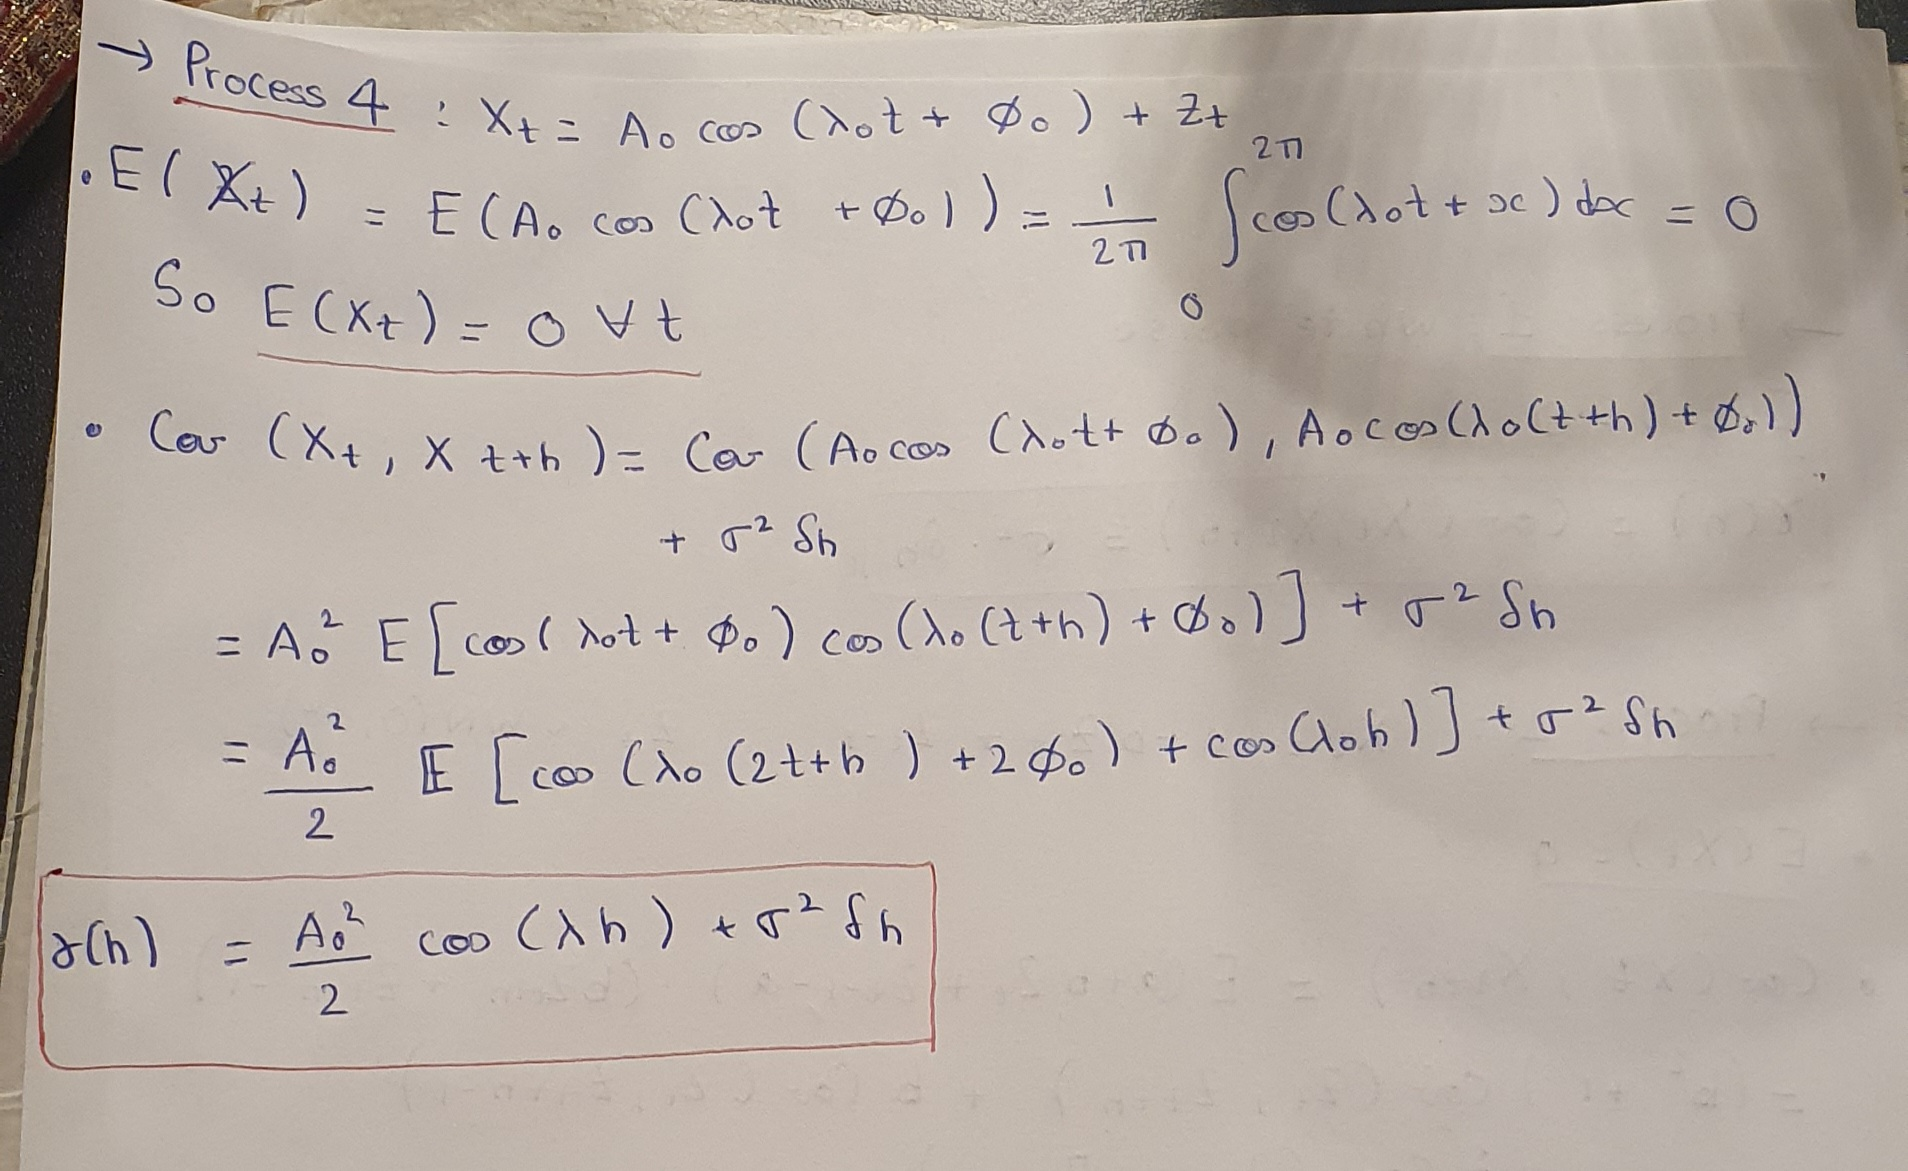

In [3]:

from IPython.display import Image
image_path1 =r'C:\Users\manel\OneDrive\Documents\2A\tsia\tp1_monroux_wafra\q1_bis.jpg'
Image(filename=image_path1 , width=300, height=200)


In [ ]:
#Question 1


m1_th = 0
def autocov1_th(h, sig):
    return sig**2 if h == 0 else 0

m2_th = a
def autocov2_th(h, a, b):
    if h == 0:
        return (b**2 + 1)*sig**2
    elif h == 1:
        return b*sig**2
    else:
        return 0
    
m3_th = a
def autocov3_th(h, K):
    return 2**(-h)*sig**2*4/3

m4_th = 0
def autocov4_th(h, A0, lambda0):
    p = 0
    if h ==0:
        p = 1
    return A0**2 * np.cos(lambda0*h)/2 + p*sig**2
    



In [21]:
#Question 2
#computing the estimators
n = 1000

def estim_mean(X, n):
    S = 0
    for i in range(n):
        S += X[i]
    return S/n

def estim_autocov(X, n, m, h):
    # we suppose n-1>=h>=0
    S = 0
    for k in range(1, n-h):
        S += (X[k]-m)*(X[k+h]-m)
    return S/n

#first process

def process1(n, sig):
    X1 = [0]*n
    for i in range(n):
        X1[i]  = np.random.normal(0, sig)
    m1 = estim_mean(X1, n)
    autocov1 = [0]*n
    for h in range(n-1):
        autocov1[h] = estim_autocov(X1, n, m1, h)
    return m1, autocov1

res1 = process1(n, sig)
print("mean of the first process: ", res1[0], " autocovariance :", res1[1])

#second process

def process2(n, a, b):
    X1 = [0]*n
    for i in range(n):
        X1[i]  = np.random.normal(0, sig)
    X2 = [0]*n
    for i in range(n):
        X2[i] = a + b*X1[i] + X1[i-1]
    m2 = estim_mean(X2, n)
    autocov2 = [0]*n
    for h in range(n-1):
        autocov2[h] = estim_autocov(X2, n, m2, h)
    return m2, autocov2

res2 = process2(n, a, b)
print("mean of the second process: ", res2[0], " autocovariance :", res2[1])

#third process

def process3(n, K):
    X1 = [0]*n
    for i in range(n):
        X1[i]  = np.random.normal(0, sig)
    X1prime = [0]*K
    for i in range(K):
        X1prime[i]  = np.random.normal(0, sig)
    X3 = [0]*n
    for i in range(n):
        X3[i] = a
        for k in range(K):
            #si i-k<0, on utilise la deuxième liste de bruits blancs.
            if i-k >= 0:
                X3[i] += 2**(-k)*X1[i-k]
            else:
                X3[i] += 2**(-k)*X1prime[k-i]
    m3 = estim_mean(X3, n)
    autocov3 = [0]*n
    for h in range(n-1):
        autocov3[h] = estim_autocov(X3, n, m3, h)
        return m3, autocov3

res3 = process3(n, K)
print("mean of the third process: ", res3[0], " autocovariance :", res3[1])

#fourth process

def process4(n, A0, lambda0):
    Phi0 = np.random.uniform(0, 2*np.pi)
    X1 = [0]*n
    for i in range(n):
        X1[i]  = np.random.normal(0, sig)
    X4 = [0]*n
    for i in range(n):
        X4[i] = A0*np.cos(lambda0*i + Phi0) + X1[i]
    m4 = estim_mean(X4, n)
    autocov4 = [0]*n
    for h in range(n-1):
        autocov4[h] = estim_autocov(X4, n, m4, h)
    return m4, autocov4

res4 = process4(n, A0, lambda0)
print("mean of the fourth process: ", res4[0], " autocovariance :", res4[1])



mean of the first process:  0.007960698917294548  autocovariance : [1.0635036984025505, -0.013782808222635834, -0.005462862352596115, 0.01642965728630999, -0.06092901458060766, 0.07772726000758975, 0.050990765511457696, -0.008269415839809481, -0.04220160744315138, 0.001201117811822469, 0.04191186139534815, 0.05727810514377394, -0.017920583746409598, 0.017550055002976843, 0.004181420804287867, -0.04094466849773392, 0.026994929110945292, 0.009968423174557305, -0.030244828649765538, 0.006241632240943524, -0.02931086450874308, 0.01113054964353619, -0.04000456454213908, -0.03789660683718287, -0.012101615788599819, -0.036852832236506324, -0.06919035007039875, 0.03688772678018138, 0.017332552086328543, 0.007511354517056851, -0.03212305299136365, -0.05833691648343342, -0.0279567648591594, -0.02674699090156645, 0.024838918466788224, -0.022050546667261094, -0.0296859583884808, 0.03184656883021746, -0.044180970273195584, 0.03435875944705431, 0.05005726968104554, 0.04022773864369545, -0.0044610343

Pour n =  10
Process 1: Experimental mean = -0.033090868350918186, Theoretical mean = 0
Process 2: Experimental mean = 0.9481666574011488, Theoretical mean = 1
Process 3: Experimental mean = 1.0469889723582635, Theoretical mean = 1
Process 4: Experimental mean = 0.037591272923374996, Theoretical mean = 0


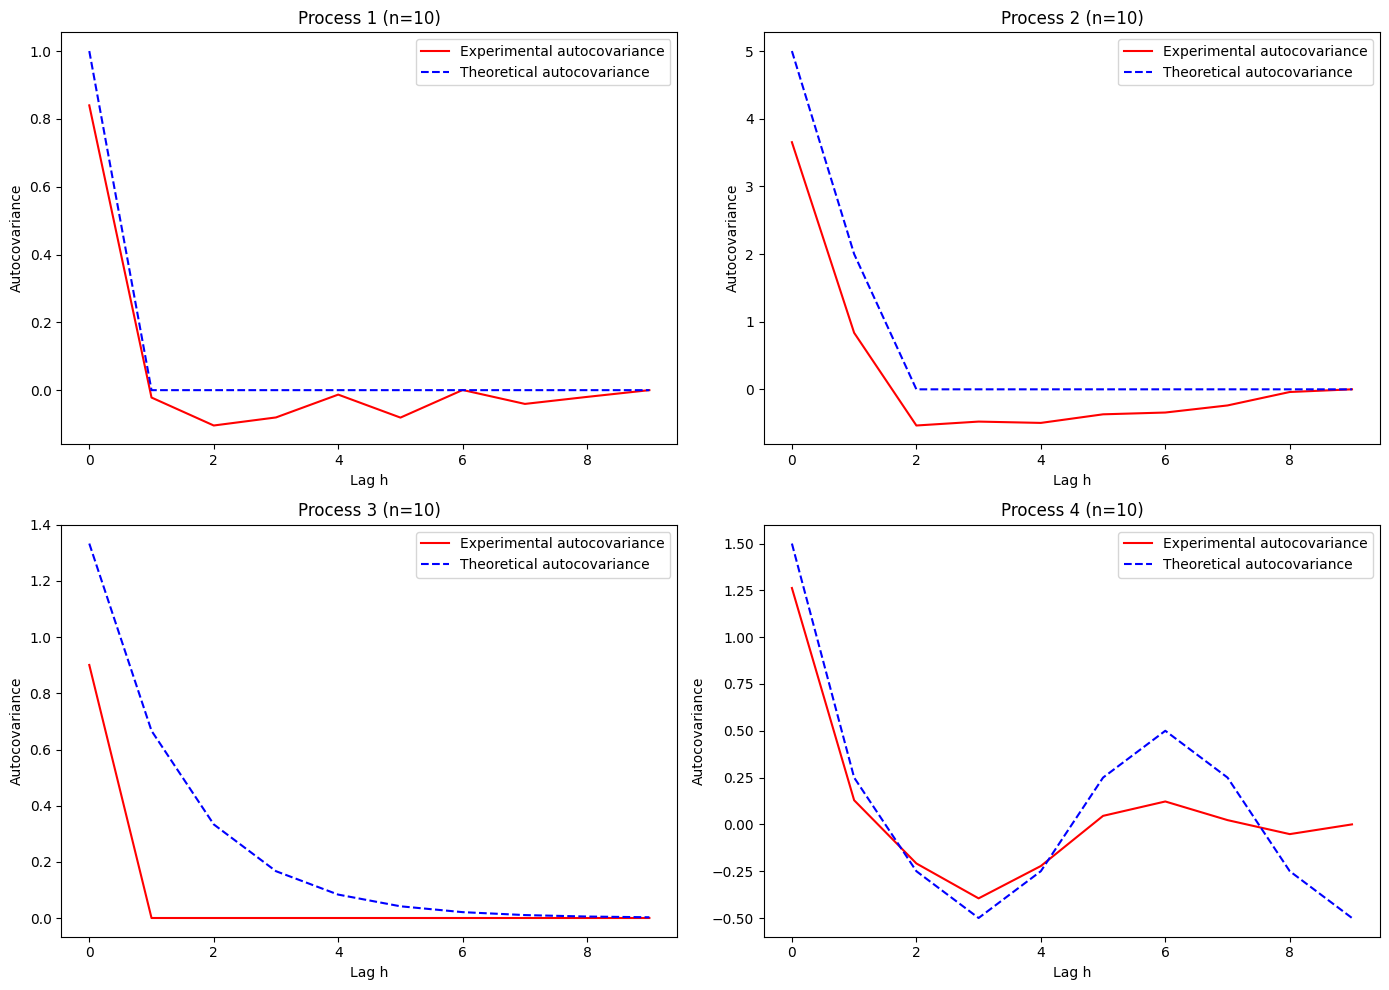

Pour n =  100
Process 1: Experimental mean = 0.0018660944544668795, Theoretical mean = 0
Process 2: Experimental mean = 1.0402435189094539, Theoretical mean = 1
Process 3: Experimental mean = 0.9760709826028926, Theoretical mean = 1
Process 4: Experimental mean = -0.0045912478920918124, Theoretical mean = 0


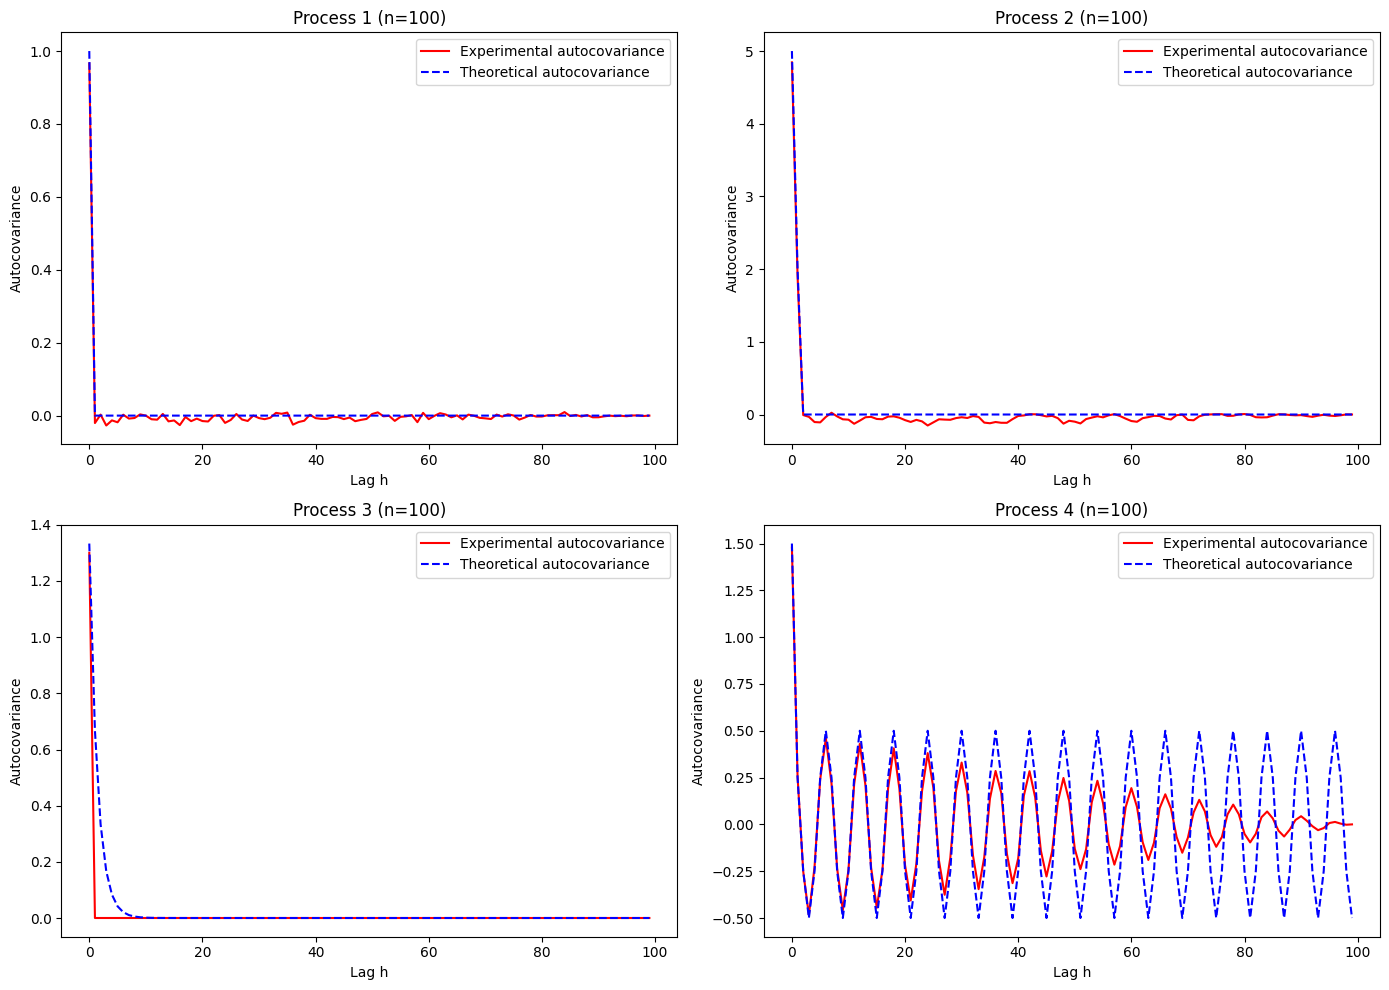

Pour n =  500
Process 1: Experimental mean = 0.0020721397722453087, Theoretical mean = 0
Process 2: Experimental mean = 1.0039301297553807, Theoretical mean = 1
Process 3: Experimental mean = 0.9954004126922286, Theoretical mean = 1
Process 4: Experimental mean = -0.006289154932449371, Theoretical mean = 0


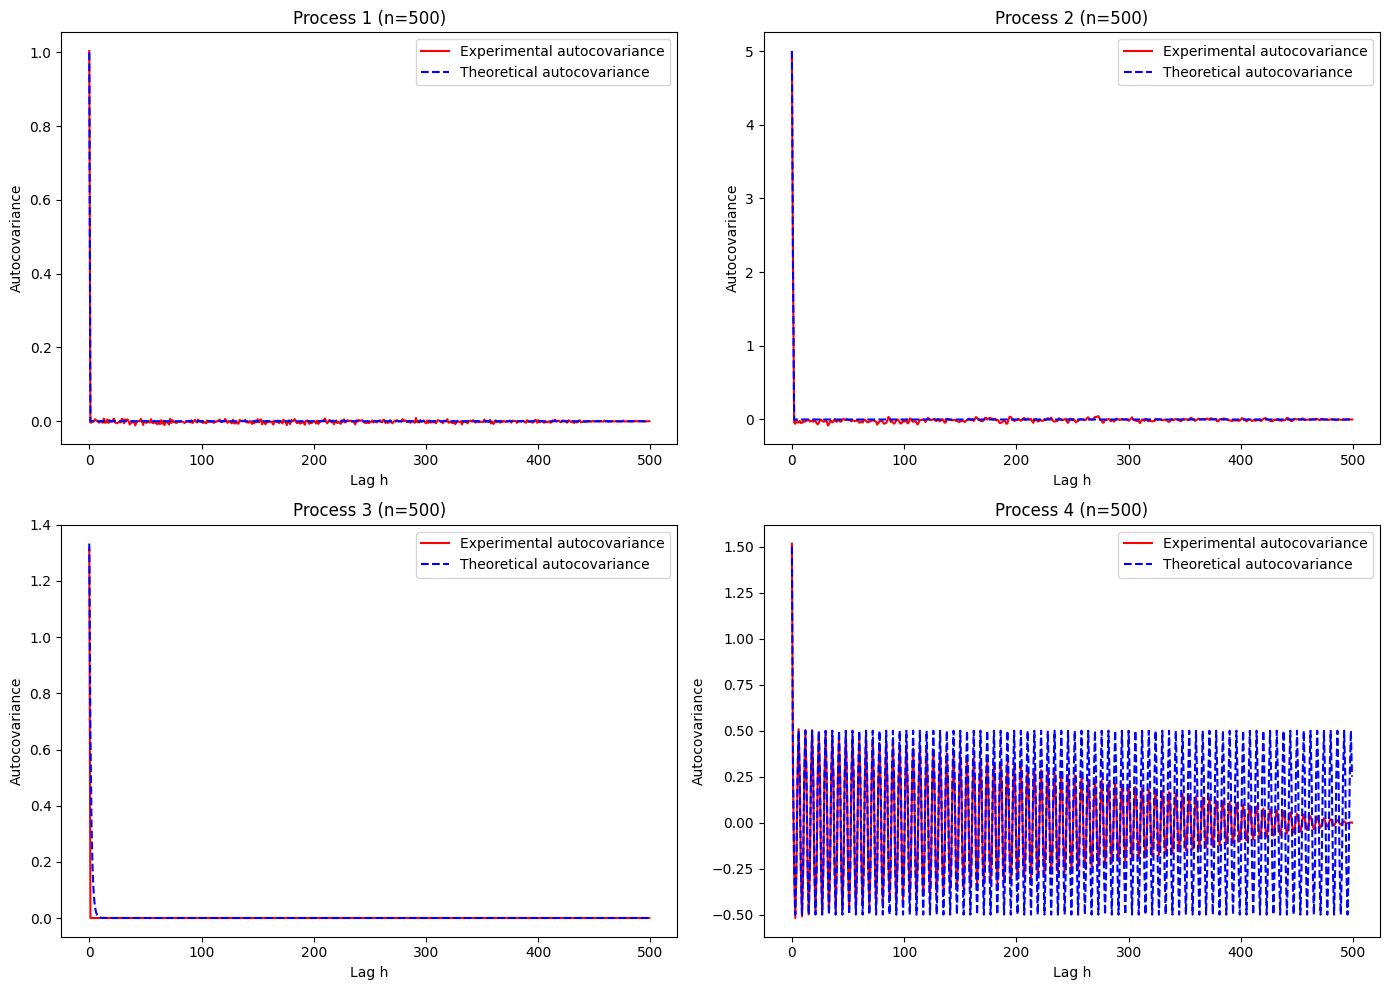

Pour n =  1000
Process 1: Experimental mean = -0.0050211982588177365, Theoretical mean = 0
Process 2: Experimental mean = 1.0112534227823973, Theoretical mean = 1
Process 3: Experimental mean = 1.0083467604938412, Theoretical mean = 1
Process 4: Experimental mean = -0.004124159215894064, Theoretical mean = 0


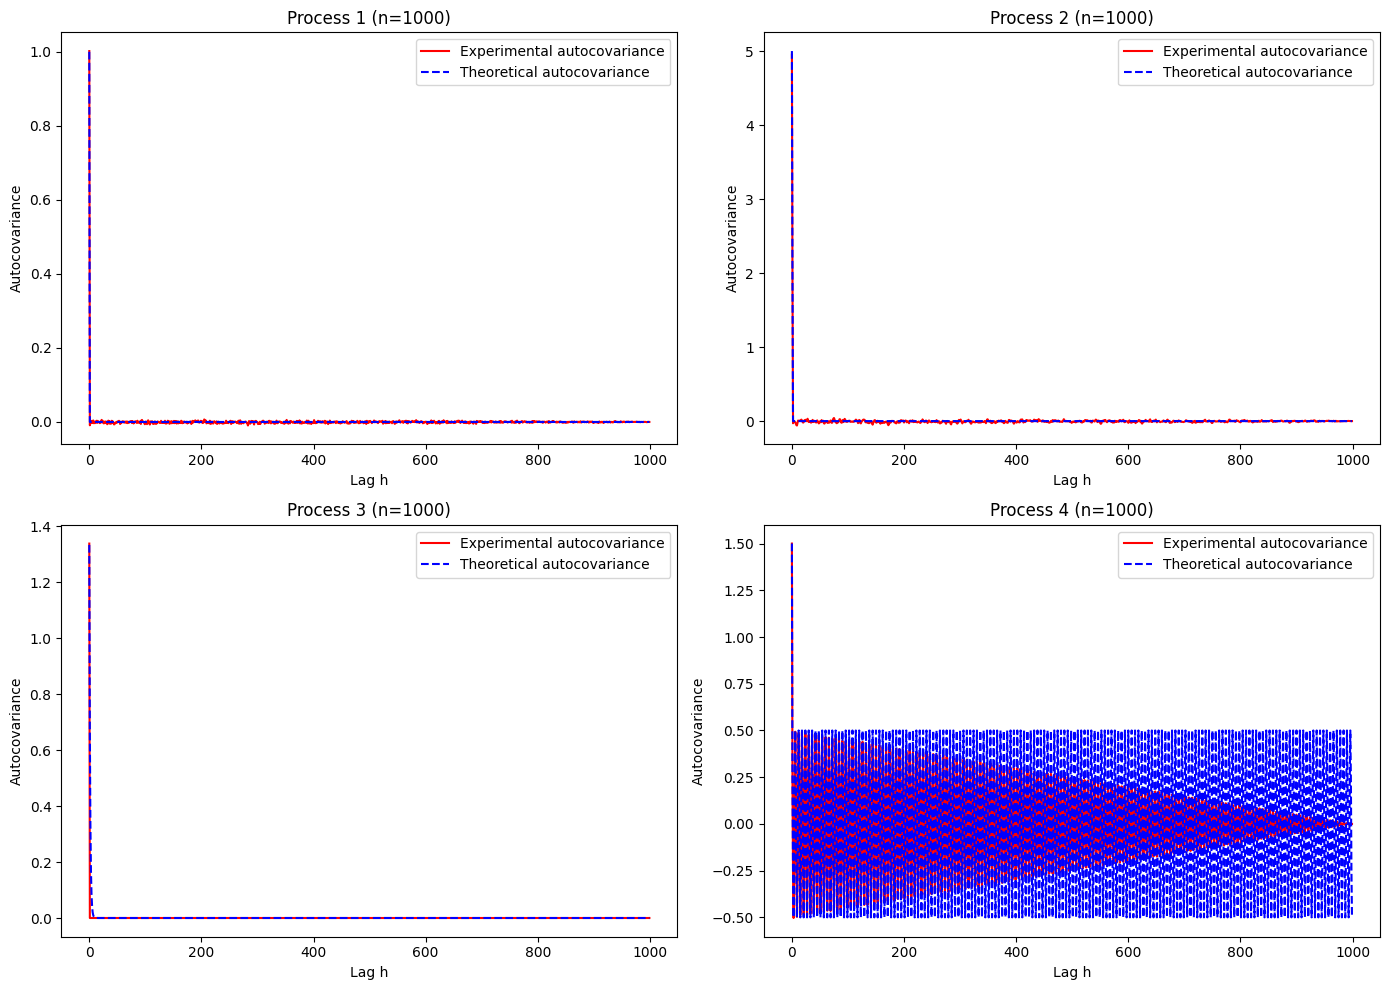

In [23]:
#Question 3
#We compare the results for different values ​​of n, for different values ​​of h, each time carrying out the calculations a large number of times, and using the average of the results.
N = [10, 100, 500, 1000] #different values of n
m = 100 #number of simulations for each value of h and n

def compare(n, m):
    m1_exp = 0
    autocov1_exp = [0] * n
    m2_exp = 0
    autocov2_exp = [0] * n
    m3_exp = 0
    autocov3_exp = [0] * n
    m4_exp = 0
    autocov4_exp = [0] * n
    for p in range(m):
        res1 = process1(n, sig)
        res2 = process2(n, a, b)
        res3 = process3(n, K)
        res4 = process4(n, A0, lambda0)
        m1_exp += res1[0]
        autocov1_exp = [autocov1_exp[i] + res1[1][i] for i in range(n)]
        m2_exp += res2[0]
        autocov2_exp = [autocov2_exp[i] + res2[1][i] for i in range(n)]
        m3_exp += res3[0]
        autocov3_exp = [autocov3_exp[i] + res3[1][i] for i in range(n)]
        m4_exp += res4[0]
        autocov4_exp = [autocov4_exp[i] + res4[1][i] for i in range(n)]
    m1_exp /= m
    autocov1_exp = [x/m for x in autocov1_exp]
    m2_exp /= m
    autocov2_exp = [x/m for x in autocov2_exp]
    m3_exp /= m
    autocov3_exp = [x/m for x in autocov3_exp]
    m4_exp /= m
    autocov4_exp = [x/m for x in autocov4_exp]

    # Plot the results for each process
    plot_results(m1_exp, autocov1_exp, m2_exp, autocov2_exp, m3_exp, autocov3_exp, m4_exp, autocov4_exp, n)


def plot_results(m1_exp, autocov1_exp, m2_exp, autocov2_exp, m3_exp, autocov3_exp, m4_exp, autocov4_exp, n):
    #plots for the different processes in function of h
    lags = range(len(autocov1_exp))  # Define lag range

    plt.figure(figsize=(14, 10))

    # Process 1
    plt.subplot(2, 2, 1)
    plt.title(f"Process 1 (n={n})")
    plt.plot(lags, autocov1_exp, 'r-', label="Experimental autocovariance")
    plt.plot(lags, [autocov1_th(h, sig) for h in lags], 'b--', label="Theoretical autocovariance")
    plt.xlabel("Lag h")
    plt.ylabel("Autocovariance")
    plt.legend()
    print(f"Process 1: Experimental mean = {m1_exp}, Theoretical mean = {m1_th}")


    # Process 2
    plt.subplot(2, 2, 2)
    plt.title(f"Process 2 (n={n})")
    plt.plot(lags, autocov2_exp, 'r-', label="Experimental autocovariance")
    plt.plot(lags, [autocov2_th(h, a, b) for h in lags], 'b--', label="Theoretical autocovariance")
    plt.xlabel("Lag h")
    plt.ylabel("Autocovariance")
    plt.legend()
    print(f"Process 2: Experimental mean = {m2_exp}, Theoretical mean = {m2_th}")


    # Process 3
    plt.subplot(2, 2, 3)
    plt.title(f"Process 3 (n={n})")
    plt.plot(lags, autocov3_exp, 'r-', label="Experimental autocovariance")
    plt.plot(lags, [autocov3_th(h, K) for h in lags], 'b--', label="Theoretical autocovariance")
    plt.xlabel("Lag h")
    plt.ylabel("Autocovariance")
    plt.legend()
    print(f"Process 3: Experimental mean = {m3_exp}, Theoretical mean = {m3_th}")


    # Process 4
    plt.subplot(2, 2, 4)
    plt.title(f"Process 4 (n={n})")
    plt.plot(lags, autocov4_exp, 'r-', label="Experimental autocovariance")
    plt.plot(lags, [autocov4_th(h, A0, lambda0) for h in lags], 'b--', label="Theoretical autocovariance")
    plt.xlabel("Lag h")
    plt.ylabel("Autocovariance")
    plt.legend()
    print(f"Process 4: Experimental mean = {m4_exp}, Theoretical mean = {m4_th}")


    plt.tight_layout()
    plt.show()

for n in N:
    print("Pour n = ", n)
    compare(n, m)



For n = 10


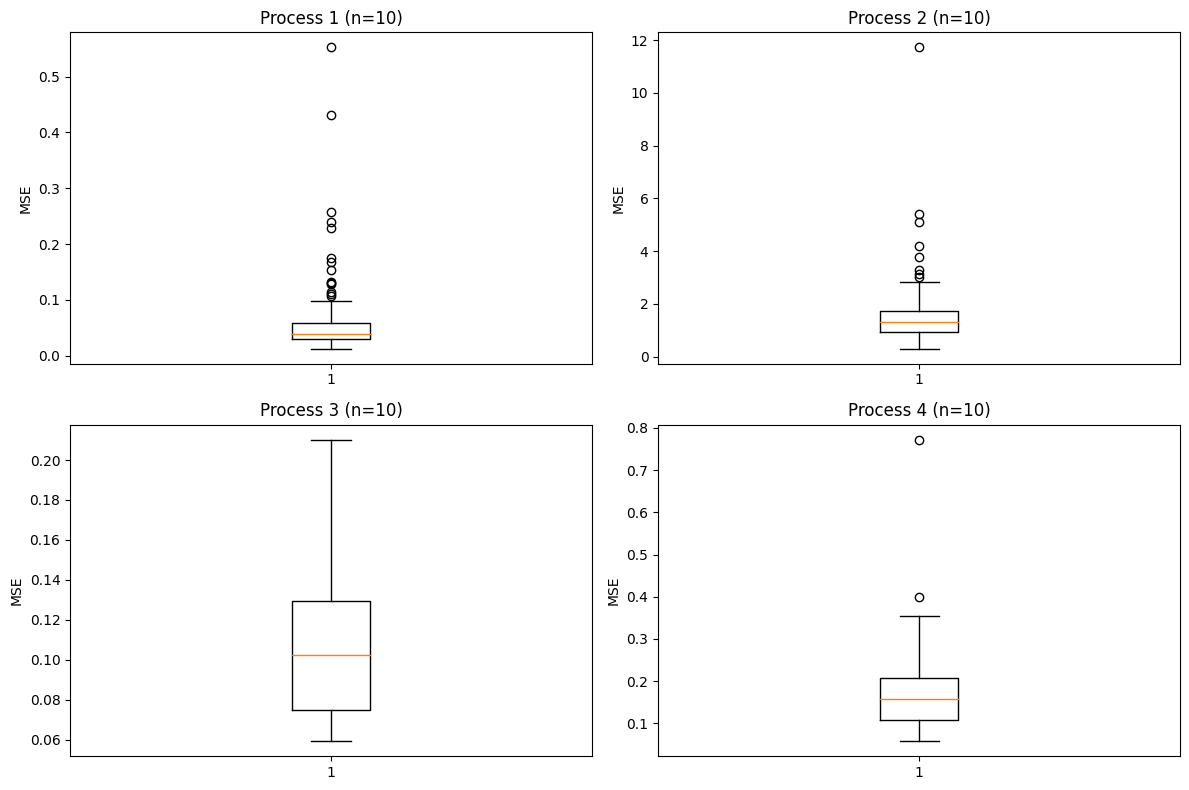

For n = 100


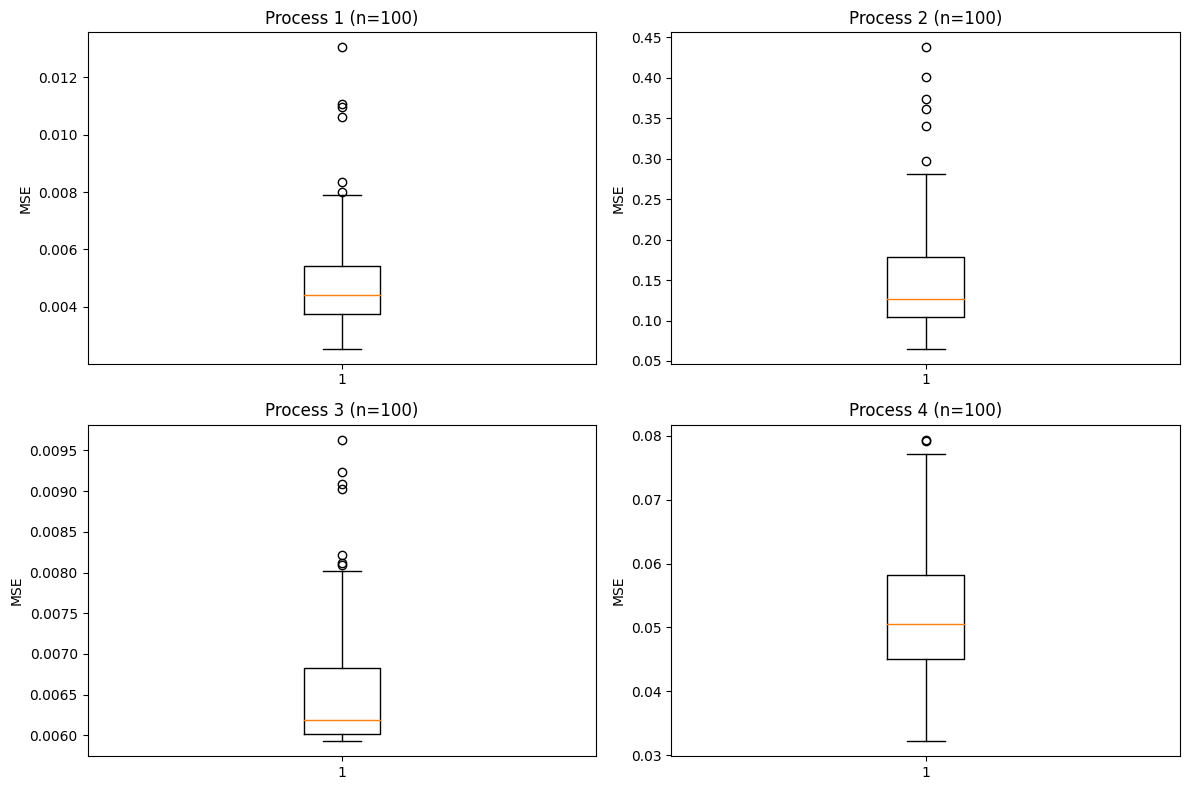

For n = 500


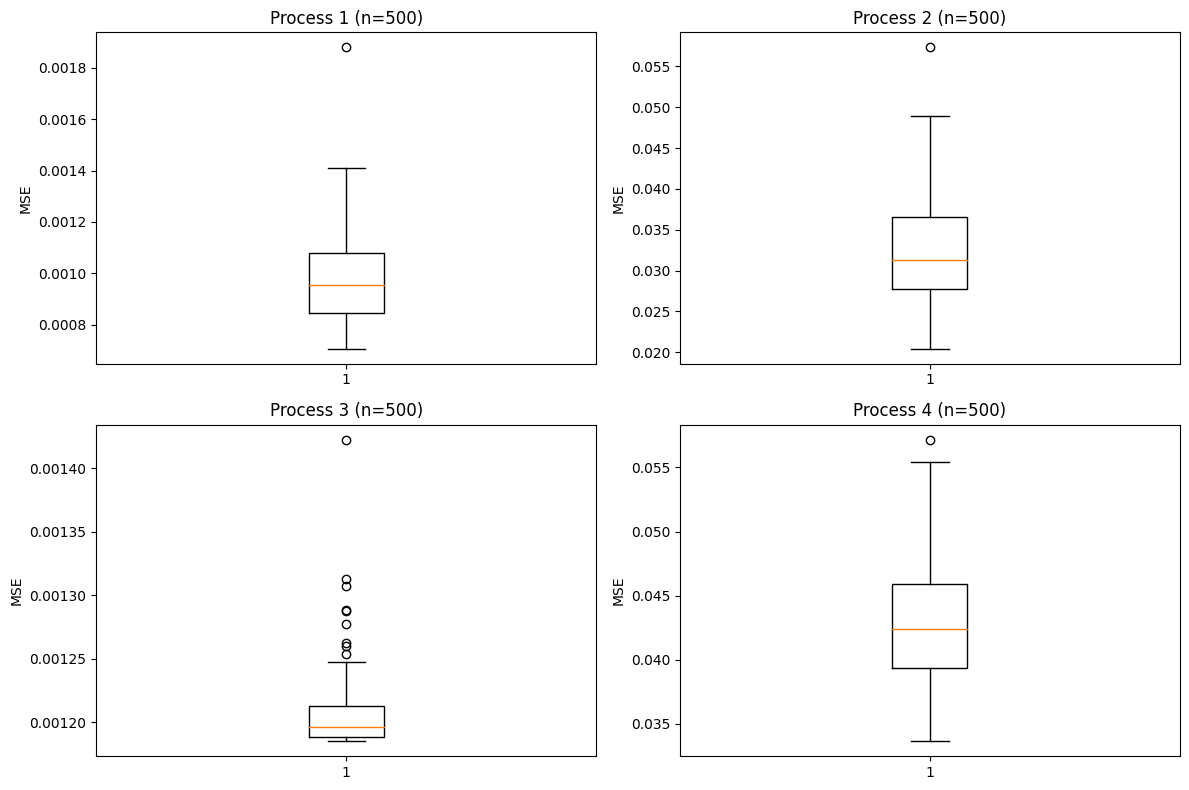

For n = 1000


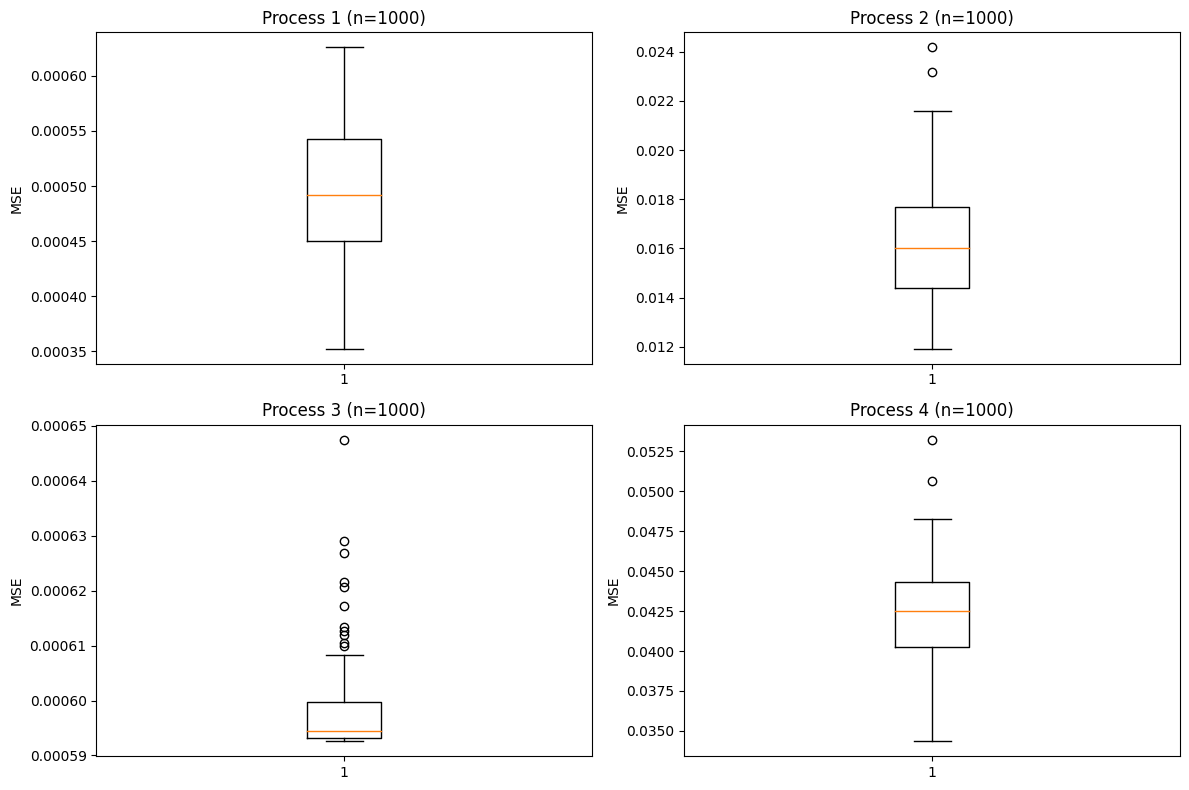

In [24]:
#Question 4
T = [10, 100, 500, 1000]
m = 100 #number of simulations for each value of h and n

def MSE(gamma_th, gamma_exp, n):
    #takes as arguments two functions of h and the number n
    S = 0
    for h in range(n):
        S += (gamma_th(h) - gamma_exp[h])**2
    return S/n

def calculate_MSEs(n, m):
    MSE_1 = []
    MSE_2 = []
    MSE_3 = []
    MSE_4 = []
    for p in range(m):
        res1 = process1(n, sig)
        res2 = process2(n, a, b)
        res3 = process3(n, K)
        res4 = process4(n, A0, lambda0)
        MSE_1.append(MSE(lambda h: autocov1_th(h, sig), res1[1], n))
        MSE_2.append(MSE(lambda h: autocov2_th(h, a, b), res2[1], n))
        MSE_3.append(MSE(lambda h: autocov3_th(h, K), res3[1], n))
        MSE_4.append(MSE(lambda h: autocov4_th(h, A0, lambda0), res4[1], n))
    return (MSE_1, MSE_2, MSE_3, MSE_4)

# Main loop to calculate MSEs and display boxplots
for n in T:
    print("For n =", n)
    
    # Calculate the MSE for each process
    MSEs = calculate_MSEs(n, m)
    
    # Create boxplots for the MSE of each process
    plt.figure(figsize=(12, 8))
    
    # MSE for process 1
    plt.subplot(2, 2, 1)
    plt.boxplot(MSEs[0])
    plt.title(f"Process 1 (n={n})")
    plt.ylabel("MSE")
    
    # MSE for process 2
    plt.subplot(2, 2, 2)
    plt.boxplot(MSEs[1])
    plt.title(f"Process 2 (n={n})")
    plt.ylabel("MSE")
    
    # MSE for process 3
    plt.subplot(2, 2, 3)
    plt.boxplot(MSEs[2])
    plt.title(f"Process 3 (n={n})")
    plt.ylabel("MSE")
    
    # MSE for process 4
    plt.subplot(2, 2, 4)
    plt.boxplot(MSEs[3])
    plt.title(f"Process 4 (n={n})")
    plt.ylabel("MSE")
    
    # Show all plots
    plt.tight_layout()
    plt.show()
